In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import minimize

In [3]:
pxx = np.load('pxx.npy')[1:]

In [4]:
fr = np.load('fr.npy')[1:]

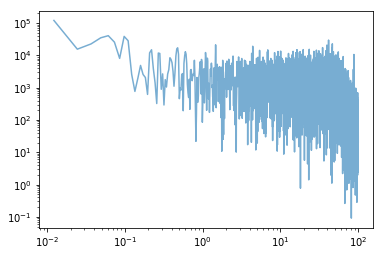

In [5]:
loglog(fr, pxx, alpha = 0.6)

In [6]:
euler_mascheroni = 0.57721566490153286060
A1 = np.sqrt(pi*pi/6.)

In [83]:
p0x = np.array([2000, 0.2, 1.5, 30., 10])

In [84]:
def noise_model_with_alpha(f, white_noise, f_knee, alpha, f_c, amp):
    return ((white_noise)*(1. + (f_knee/f)**alpha)* (1./(1. + (f/f_c)**2))+amp)

In [85]:
def priors(x):
    white_noise, f_knee, alpha, f_c, amp = x
    if white_noise <= 0 or f_knee <= 0 or alpha <= 0 or f_c <= 0 or amp <= 0:
        return np.inf
    else:
        return 0

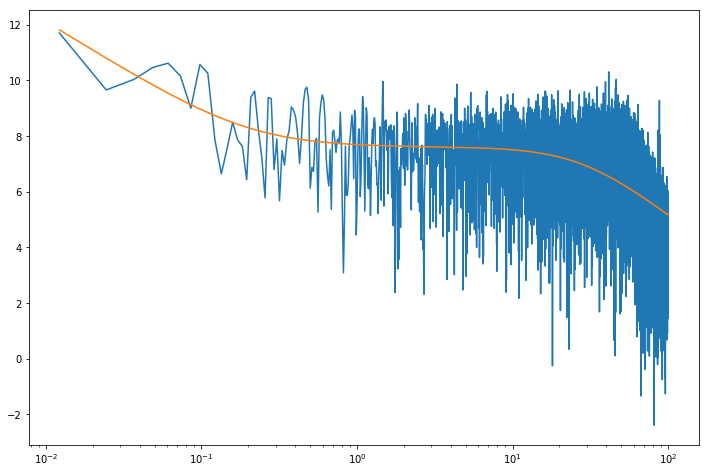

In [86]:
semilogx(fr, np.log(pxx))
semilogx(fr, np.log(noise_model_with_alpha(fr, *p0x)))

In [138]:
def resids(x):
    white_noise, f_knee, alpha, f_c, amp = x
    prior = priors(x)
    lnmodel = np.log(noise_model_with_alpha(fr, white_noise, f_knee, alpha, f_c, amp))
    if np.isfinite(prior):
        rms = np.log(pxx) - lnmodel + euler_mascheroni
        return np.dot(rms, rms)
    else:
        return prior

In [139]:
popt1 = minimize(resids, p0x)

In [140]:
popt2 = minimize(resids, p0x, bounds=((None, None), (0, None), (0, None), (0, None), (None, None)) )

In [141]:
popt3 = minimize(resids, p0x, method='Powell')

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel-5.1.0-py3.7.egg/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:1936: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)


In [142]:
print(popt1.x)
print(popt2.x)
print(popt3.x)

[2.00004389e+03 1.21572215e+00 2.28878095e-01 3.35167715e+01
 1.01162409e+01]
[2.00003529e+03 1.39147471e+00 9.38894825e-01 3.28368635e+01
 1.00950093e+01]
[3.37064668e+03 1.57051071e-01 1.88771554e+00 2.98659043e+01
 3.38192029e-07]


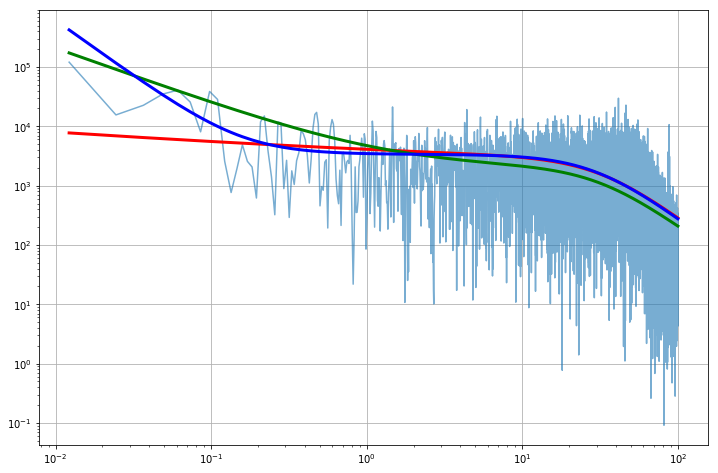

In [143]:
figsize(12, 8)
loglog(fr, pxx, alpha = 0.6)
loglog(fr, noise_model_with_alpha(fr, *popt1.x), 'r', lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt2.x), 'g', lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt3.x), 'b', lw=3)
grid(ls='-')

# used the powell best fit as the new initial condition and everything converges to the same line now and its a nice line so now were happy

In [144]:
popt1 = minimize(resids, popt3.x)

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel-5.1.0-py3.7.egg/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel-5.1.0-py3.7.egg/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [145]:
popt2 = minimize(resids, popt3.x, bounds=((None, None), (0, None), (0, None), (0, None), (None, None)) )

In [146]:
popt3 = minimize(resids, popt3.x, method='Powell')

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel-5.1.0-py3.7.egg/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [147]:
print('white noise', 'f knee', 'alpha', 'fc', 'amp')
print(popt1.x)
print(popt2.x)
print(popt3.x)

white noise f knee alpha fc amp
[3.37064668e+03 1.57051071e-01 1.88771554e+00 2.98659043e+01
 3.38192029e-07]
[3.37064668e+03 1.57051071e-01 1.88771554e+00 2.98659043e+01
 3.38192029e-07]
[3.37497186e+03 1.56573854e-01 1.88945622e+00 2.98418519e+01
 1.63465760e-09]


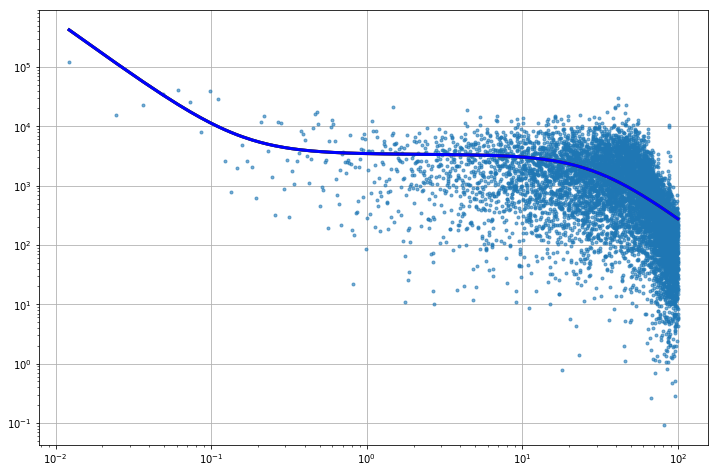

In [148]:
figsize(12, 8)
loglog(fr, pxx, '.', alpha = 0.6)
loglog(fr, noise_model_with_alpha(fr, *popt1.x), 'r', lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt2.x), 'g', lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt3.x), 'b', lw=3)
grid(ls='-')

## i think you can tell already the "roll off" is wrong!